In [7]:
#pip install pandas sqlite3


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from scipy.stats import zscore #To explore the dataset and spot ouliers


In [9]:
# Connect to the SQLite database
conn = sqlite3.connect('../sql/Customer_Behavior.db')

# Define your SQL query
query = "SELECT * FROM E_Comm_Customer_Behavior"

# Use pandas to execute the query and read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


In [10]:
# First, let's start by reviewing, describing, and printing the dataset. 
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())
print(df.columns)


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating Discount Applied  Days Since Last Purchase  \
0               14             4.6             TRUE                        25   
1               11             4.1            FALSE                        18   
2                9             3.4             TRUE                        42   
3               19             4.7            FALSE                        12   
4               13             4.0             TRUE                        55   

  Satisfaction Level  
0          Satisfied  
1            Neu

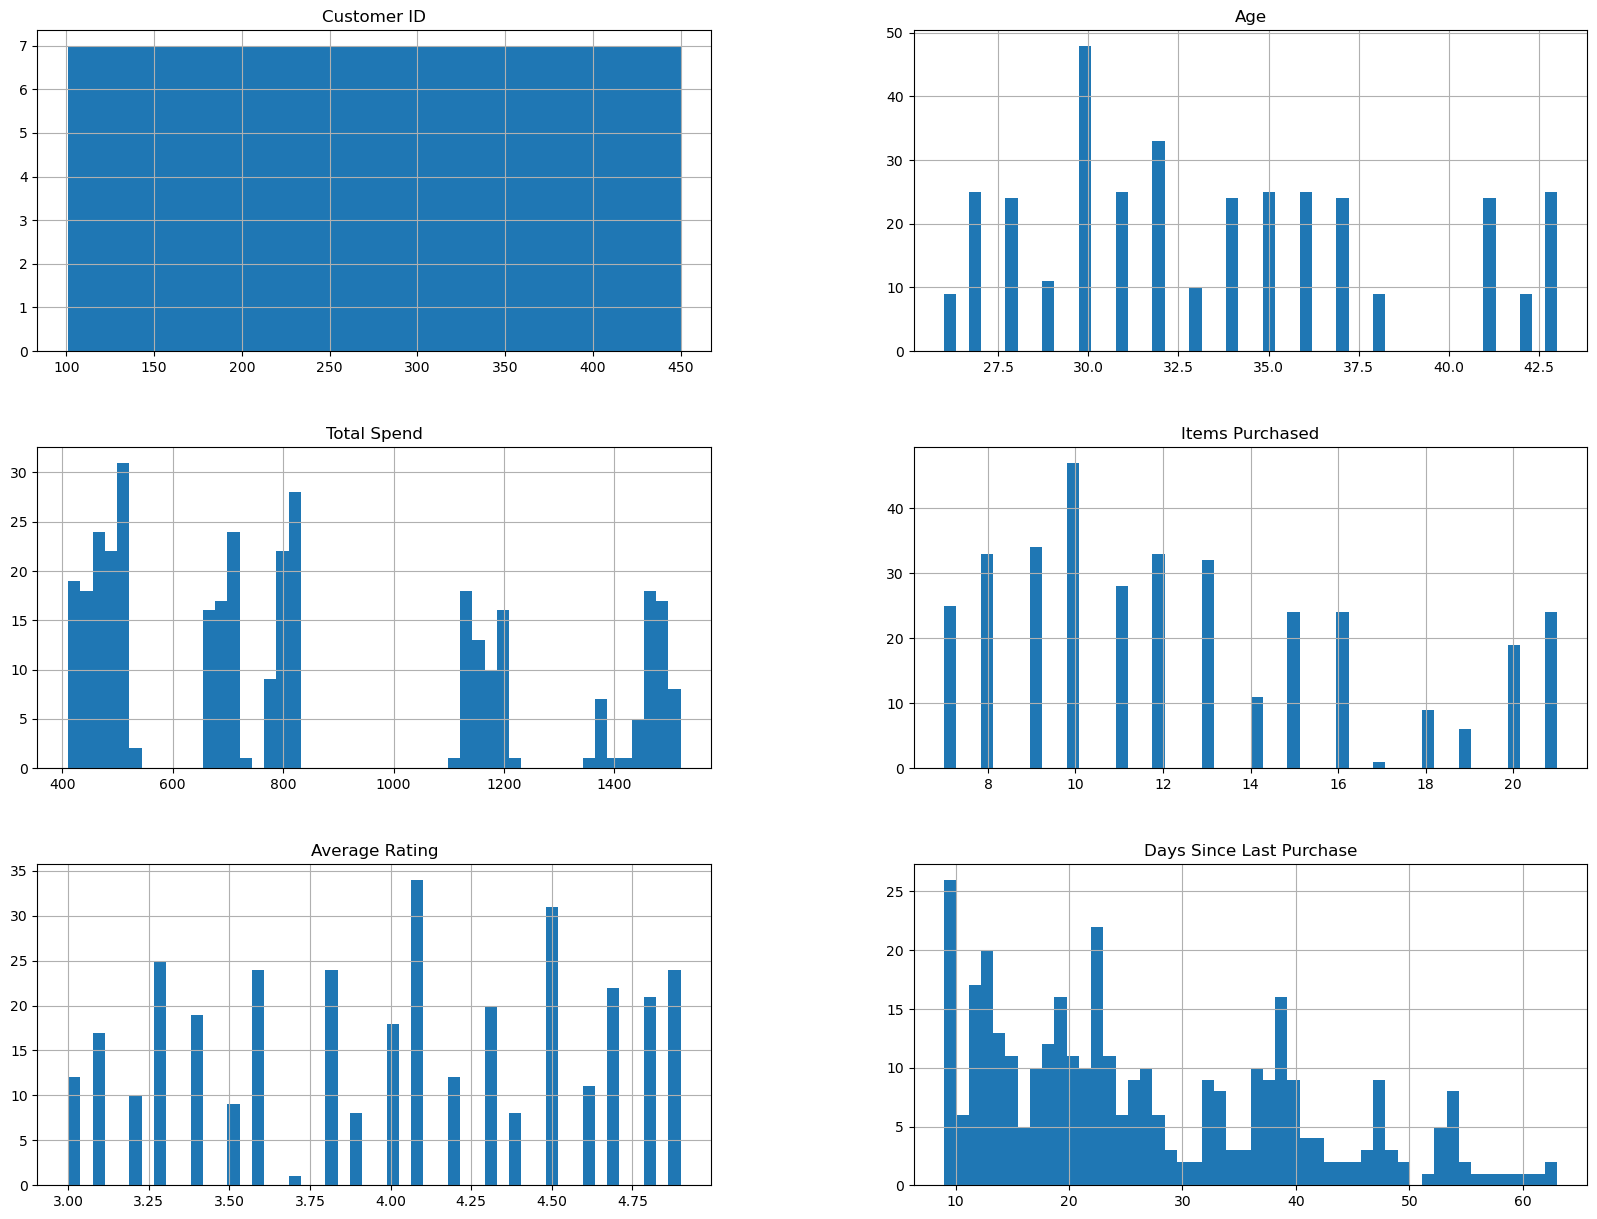

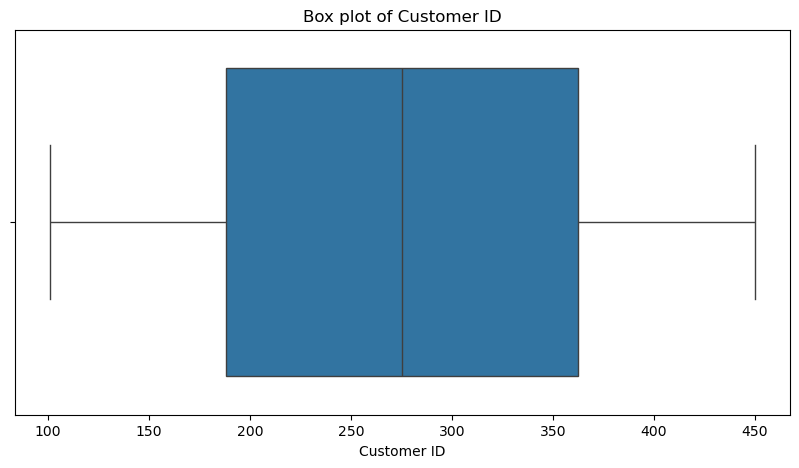

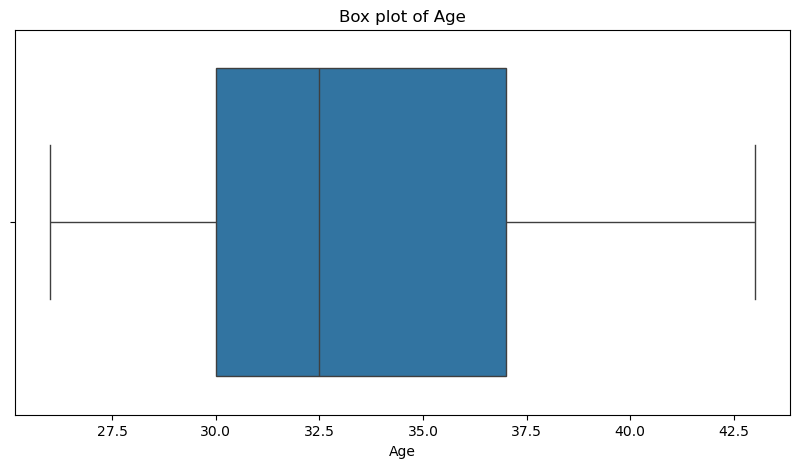

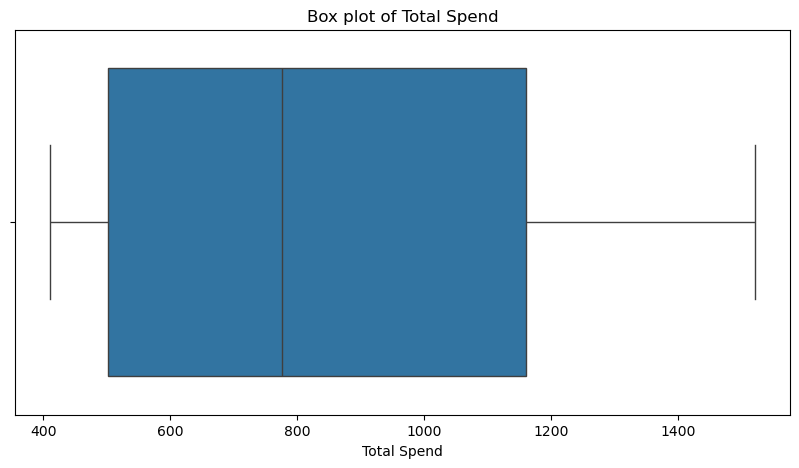

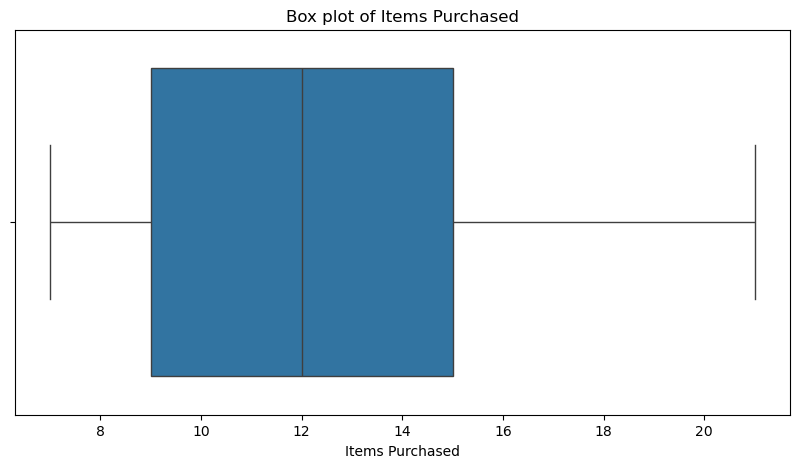

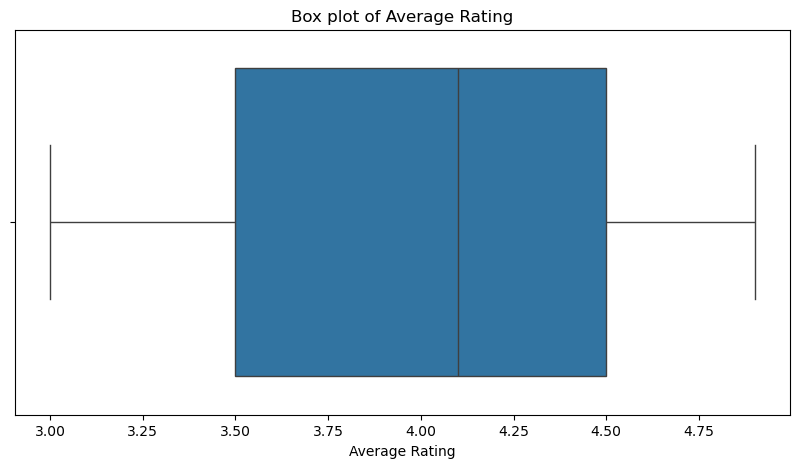

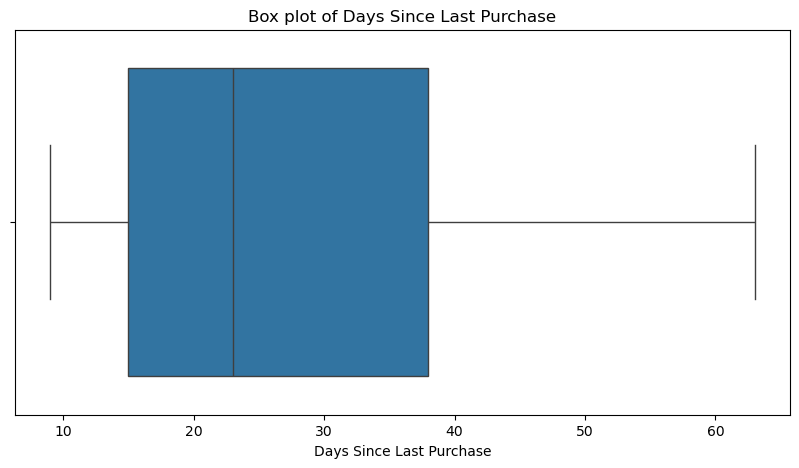

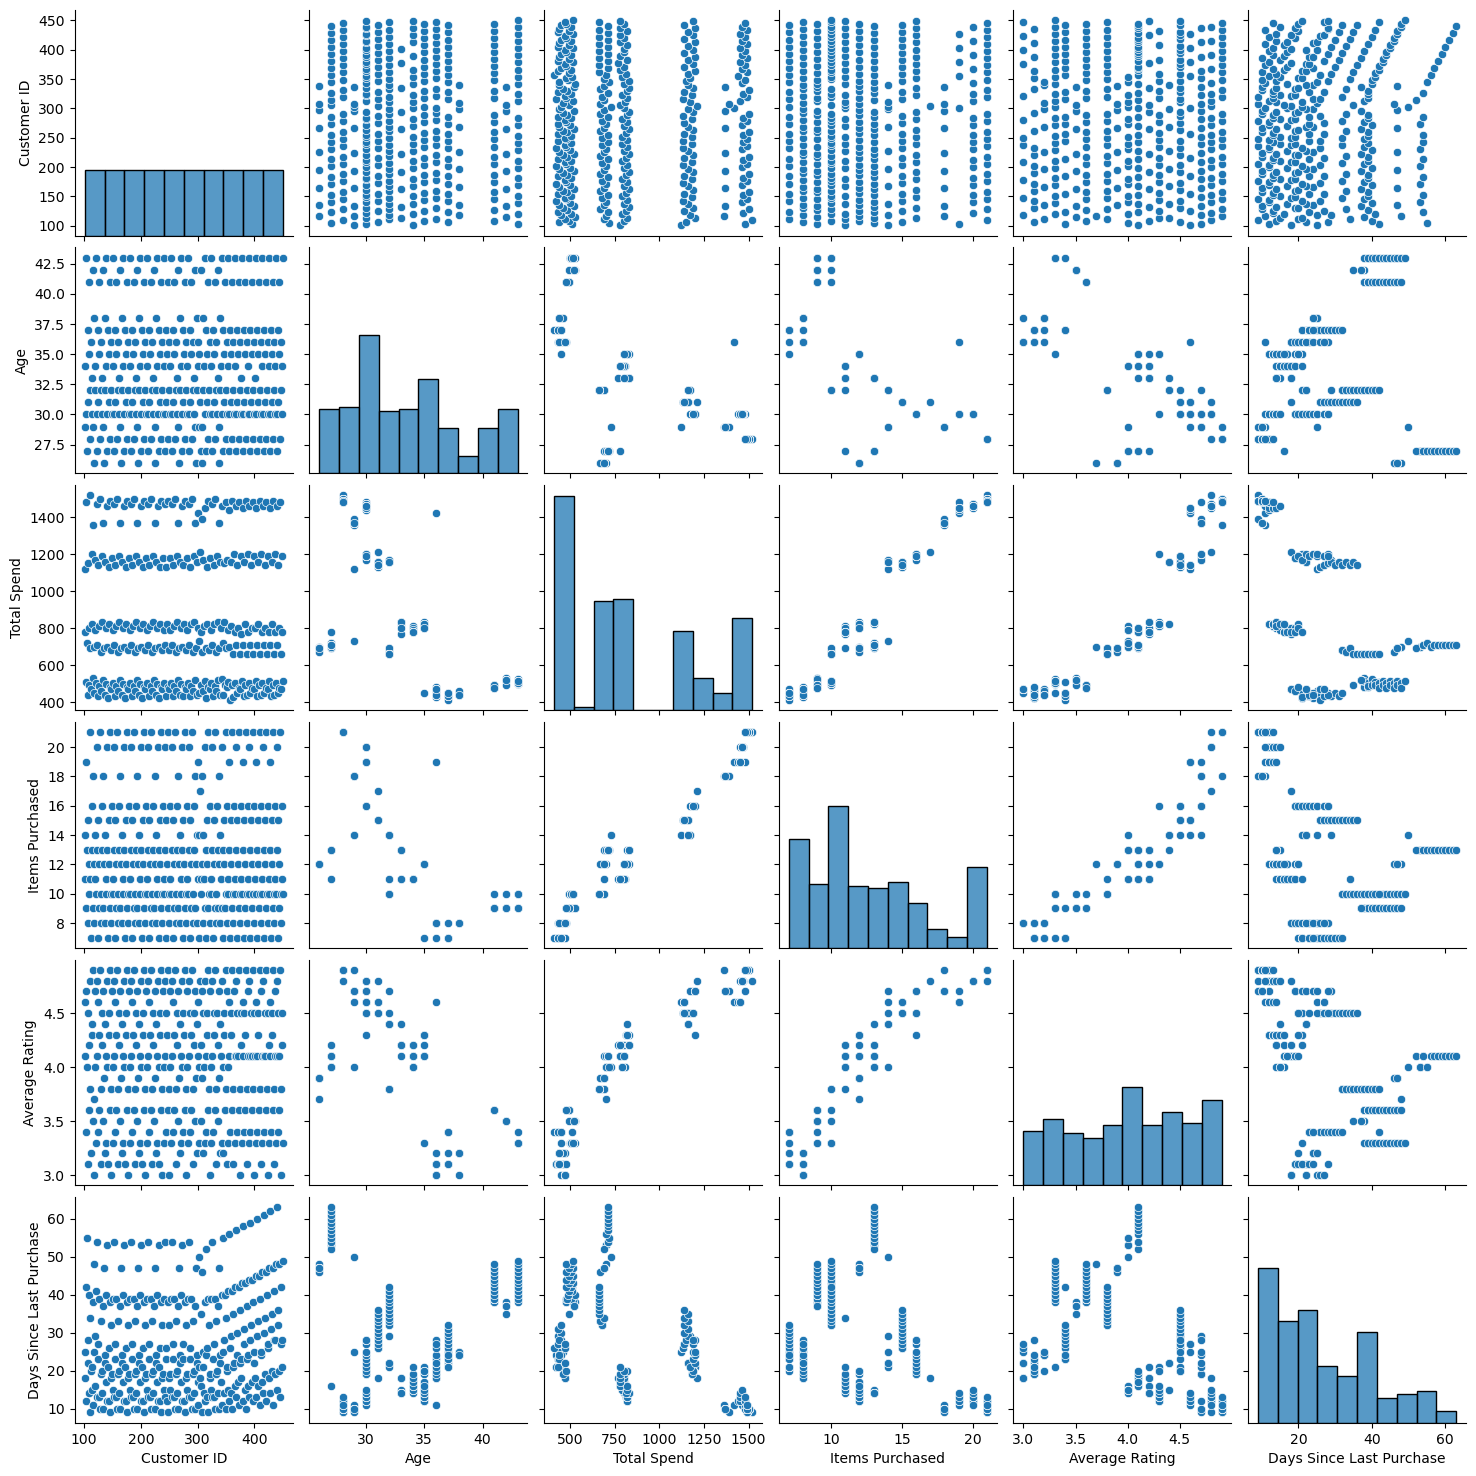

In [11]:
# Histograms for numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots to identify outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pair plots for visualizing relationships between numerical features
sns.pairplot(df)
plt.show()


In [12]:
# Calculate Z-scores for numerical columns
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
z_scores


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,-1.727109,-0.945152,0.760130,0.337346,1.001981,-0.118359
1,-1.717212,0.082826,-0.179459,-0.385538,0.139479,-0.639907
2,-1.707314,1.933185,-0.925570,-0.867461,-1.068024,1.148256
3,-1.697417,-0.739557,1.756144,1.542153,1.174482,-1.086947
4,-1.687519,-1.356343,-0.345692,0.096385,-0.033022,2.116844
...,...,...,...,...,...,...
345,1.687519,-0.328365,-0.511924,-0.626500,-0.378022,1.148256
346,1.697417,0.494017,-1.036899,-1.108422,-1.758026,0.030654
347,1.707314,-0.739557,0.955405,0.819269,0.829481,0.105161
348,1.717212,0.082826,-0.180289,-0.385538,0.311979,-0.416386


In [13]:
# Identify outliers (rows with Z-scores > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers using Z-score:")
print(outliers)


Outliers using Z-score:
Empty DataFrame
Columns: [Customer ID, Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, Satisfaction Level]
Index: []
